In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F



train = datasets.MNIST('', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST('', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))


trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

#creates a neural network of 3 hidden layers
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
#output has 10 values

#forward ensures a fully connected layer
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1) #dim =1 ensures the output is on a 0-1 scale which would tell us the probability

net = Net()
print(net)



Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [2]:
import torch.optim as optim  #OPTIMIZER IMPORT

optimizer = optim.Adam(net.parameters(), lr = 0.001)

#nll for default
#cross entropy for scalar values
#if data is array/tensor, use MSE loss function

EPOCHS = 3

for epoch in range(EPOCHS):
    #data is a set of featuresets and labels
    for data in trainset:
        X,y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)  #computes the loss differences
        loss.backward()               
        optimizer.step() #will adjust the weights
    print(loss)
    
    #the loss decreases after every iteration when the weights become to adjust according to the desired output. As seen in the last output, the loss is only 0.12%.
     
        

tensor(0.1941, grad_fn=<NllLossBackward>)
tensor(1.7140, grad_fn=<NllLossBackward>)
tensor(0.0012, grad_fn=<NllLossBackward>)


In [3]:
correct = 0
total = 0

with torch.no_grad():  #you can't change weights if gradients are set to true
    for data in testset:
        X,y = data
        output = net(X.view(-1, 784))
        #print(output)
        for idx, im in enumerate(output):
            print(torch.argmax(im), y[idx])
            if torch.argmax(im) == y[idx]:  #argmax is the output of a neural network
                correct += 1
            total += 1


tensor(7) tensor(7)
tensor(2) tensor(2)
tensor(1) tensor(1)
tensor(0) tensor(0)
tensor(4) tensor(4)
tensor(1) tensor(1)
tensor(4) tensor(4)
tensor(9) tensor(9)
tensor(6) tensor(5)
tensor(9) tensor(9)
tensor(0) tensor(0)
tensor(6) tensor(6)
tensor(9) tensor(9)
tensor(0) tensor(0)
tensor(1) tensor(1)
tensor(5) tensor(5)
tensor(9) tensor(9)
tensor(7) tensor(7)
tensor(3) tensor(3)
tensor(4) tensor(4)
tensor(9) tensor(9)
tensor(6) tensor(6)
tensor(6) tensor(6)
tensor(5) tensor(5)
tensor(4) tensor(4)
tensor(0) tensor(0)
tensor(7) tensor(7)
tensor(4) tensor(4)
tensor(0) tensor(0)
tensor(1) tensor(1)
tensor(3) tensor(3)
tensor(1) tensor(1)
tensor(3) tensor(3)
tensor(4) tensor(4)
tensor(7) tensor(7)
tensor(2) tensor(2)
tensor(7) tensor(7)
tensor(1) tensor(1)
tensor(3) tensor(2)
tensor(1) tensor(1)
tensor(1) tensor(1)
tensor(7) tensor(7)
tensor(4) tensor(4)
tensor(2) tensor(2)
tensor(3) tensor(3)
tensor(5) tensor(5)
tensor(1) tensor(1)
tensor(2) tensor(2)
tensor(4) tensor(4)
tensor(4) tensor(4)


In [4]:
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.967


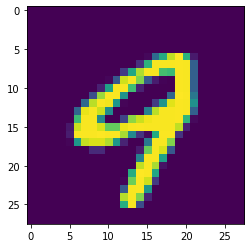

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt

#for instance we can test a value 9 i.e X[2] from the y array
plt.imshow(X[2].view(28,28))
plt.show()

In [6]:
print(torch.argmax(net(X[2].view(-1, 784))[0])) #we get tensor 9 that matches the above 28*28 pixel. In reality, it is the highest value (argmax) of the X[2] array that is tensor or index[9] which we define as the number 9

tensor(9, grad_fn=<NotImplemented>)


In [7]:
y


tensor([7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [8]:
print(torch.argmax(net(X[0].view(-1,784))[0])) #the indexing of the highest value(argmax) of any given array is the tensor defined above

tensor(7, grad_fn=<NotImplemented>)
